In [1]:
vehicles_df = pd.read_csv("vehicle.csv")

In [2]:
vehicles_df.shape

(846, 19)

In [3]:
vehicles_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 846 entries, 0 to 845
Data columns (total 19 columns):
compactness                    846 non-null int64
circularity                    841 non-null float64
distance_circularity           842 non-null float64
radius_ratio                   840 non-null float64
pr.axis_aspect_ratio           844 non-null float64
max.length_aspect_ratio        846 non-null int64
scatter_ratio                  845 non-null float64
elongatedness                  845 non-null float64
pr.axis_rectangularity         843 non-null float64
max.length_rectangularity      846 non-null int64
scaled_variance                843 non-null float64
scaled_variance.1              844 non-null float64
scaled_radius_of_gyration      844 non-null float64
scaled_radius_of_gyration.1    842 non-null float64
skewness_about                 840 non-null float64
skewness_about.1               845 non-null float64
skewness_about.2               845 non-null float64
hollows_ratio    

Notice the counts for all columns. They do not match with the number of rows observed on printing the shape.
This indicates that there are missing values in following columns
1. circularity
2. distance_circularity  
3. radius_ratio 
4. pr.axis_aspect_ratio
5. scatter_ratio 
6. elongatedness
7. pr.axis_rectangularity
8. scaled_variance
9. scaled_variance.1
10. scaled_radius_of_gyration
11. scaled_radius_of_gyration.1
12. skewness_about
13. skewness_about.1
14. skewness_about.2

Another observation from info is that class is object.


In [4]:
vehicles_df.isna().sum()

compactness                    0
circularity                    5
distance_circularity           4
radius_ratio                   6
pr.axis_aspect_ratio           2
max.length_aspect_ratio        0
scatter_ratio                  1
elongatedness                  1
pr.axis_rectangularity         3
max.length_rectangularity      0
scaled_variance                3
scaled_variance.1              2
scaled_radius_of_gyration      2
scaled_radius_of_gyration.1    4
skewness_about                 6
skewness_about.1               1
skewness_about.2               1
hollows_ratio                  0
class                          0
dtype: int64

In [5]:
#Drop the rows that have missing values
vehicles_df = vehicles_df.dropna(axis=0)



In [6]:
vehicles_df.describe().transpose()                   

,count,mean,std,min,25%,50%,75%,max
compactness,813.0,93.656827,8.233751,73.0,87.0,93.0,100.0,119.0
circularity,813.0,44.803198,6.146659,33.0,40.0,44.0,49.0,59.0
distance_circularity,813.0,82.043050,15.783070,40.0,70.0,79.0,98.0,112.0
radius_ratio,813.0,169.098401,33.615402,104.0,141.0,167.0,195.0,333.0
pr.axis_aspect_ratio,813.0,61.774908,7.973000,47.0,57.0,61.0,65.0,138.0
max.length_aspect_ratio,813.0,8.599016,4.677174,2.0,7.0,8.0,10.0,55.0
scatter_ratio,813.0,168.563346,33.082186,112.0,146.0,157.0,198.0,265.0
elongatedness,813.0,40.988930,7.803380,26.0,33.0,43.0,46.0,61.0
pr.axis_rectangularity,813.0,20.558426,2.573184,17.0,19.0,20.0,23.0,29.0
max.length_rectangularity,813.0,147.891759,14.504648,118.0,137.0,146.0,159.0,188.0


In [7]:
pd.value_counts(vehicles_df['class'])

car    413
bus    205
van    195
Name: class, dtype: int64

In [8]:
sns.boxplot( x='compactness', data = vehicles_df)

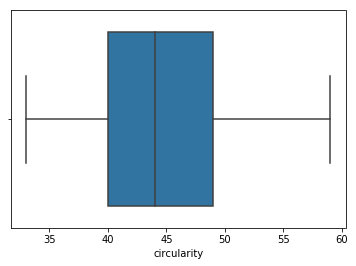

In [9]:
sns.boxplot(x='circularity', data = vehicles_df)

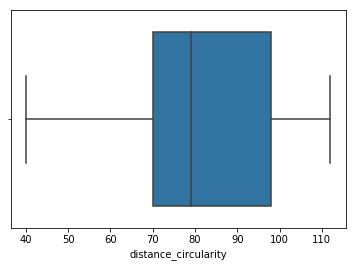

In [10]:
sns.boxplot(x='distance_circularity', data = vehicles_df)

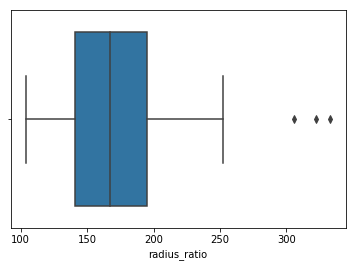

In [11]:
sns.boxplot(x='radius_ratio', data = vehicles_df)

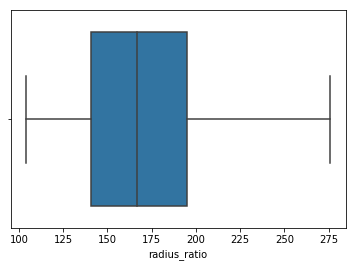

In [12]:
q75, q25 = np.percentile(vehicles_df['radius_ratio'], [75 ,25])
iqr = q75 - q25
 
min = q25 - (iqr*1.5)
max = q75 + (iqr*1.5)

vehicles_df.loc[vehicles_df['radius_ratio'] > max, 'radius_ratio'] = max
sns.boxplot(x='radius_ratio', data = vehicles_df)

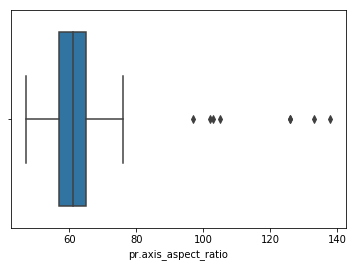

In [13]:
sns.boxplot(x='pr.axis_aspect_ratio', data = vehicles_df)

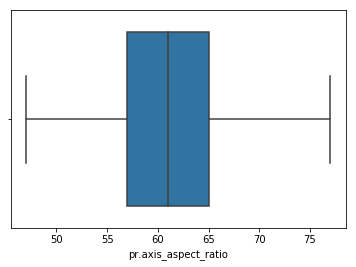

In [14]:
q75, q25 = np.percentile(vehicles_df['pr.axis_aspect_ratio'], [75 ,25])
iqr = q75 - q25
 
min = q25 - (iqr*1.5)
max = q75 + (iqr*1.5)

vehicles_df.loc[vehicles_df['pr.axis_aspect_ratio'] > max, 'pr.axis_aspect_ratio'] = max

#Replaced the outliers greater than max values with max values.

sns.boxplot(x='pr.axis_aspect_ratio', data = vehicles_df)

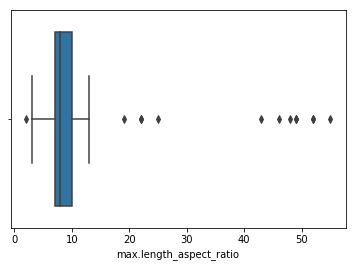

In [15]:
sns.boxplot(x='max.length_aspect_ratio', data = vehicles_df)

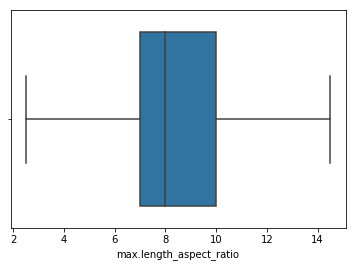

In [16]:
q75, q25 = np.percentile(vehicles_df['max.length_aspect_ratio'], [75 ,25])
iqr = q75 - q25
 
min = q25 - (iqr*1.5)
max = q75 + (iqr*1.5)
vehicles_df.loc[vehicles_df['max.length_aspect_ratio'] < min, 'max.length_aspect_ratio'] = min
vehicles_df.loc[vehicles_df['max.length_aspect_ratio'] > max, 'max.length_aspect_ratio'] = max

#Replaced the outliers with min and max accordingly

sns.boxplot(x='max.length_aspect_ratio', data = vehicles_df)

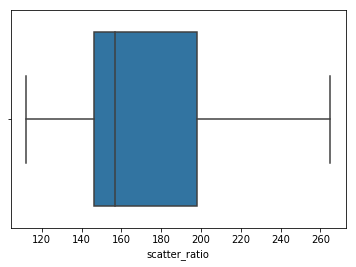

In [17]:
sns.boxplot(x='scatter_ratio', data = vehicles_df)

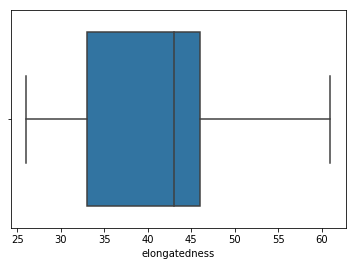

In [18]:
sns.boxplot(x='elongatedness', data = vehicles_df)

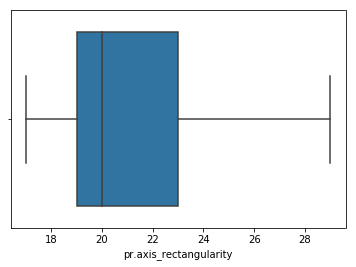

In [19]:
sns.boxplot(x='pr.axis_rectangularity', data = vehicles_df)

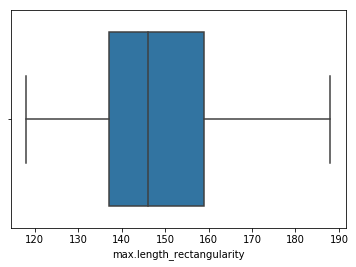

In [20]:
sns.boxplot(x='max.length_rectangularity', data = vehicles_df)

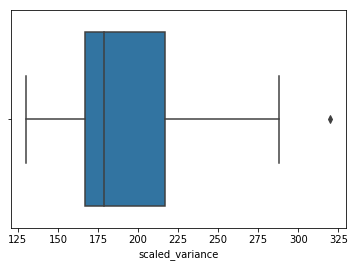

In [21]:
sns.boxplot(x='scaled_variance' , data = vehicles_df)

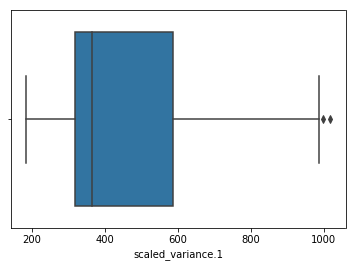

In [22]:
sns.boxplot(x='scaled_variance.1' , data = vehicles_df)

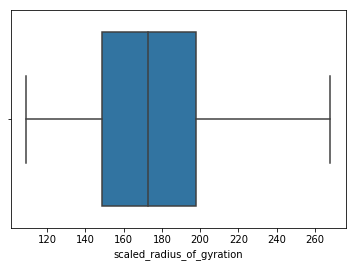

In [23]:
sns.boxplot(x='scaled_radius_of_gyration' , data = vehicles_df)

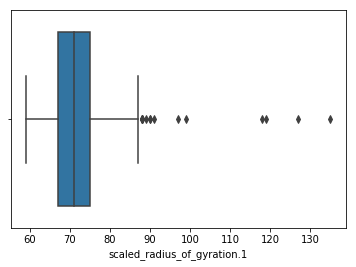

In [24]:
sns.boxplot(x='scaled_radius_of_gyration.1',data = vehicles_df)

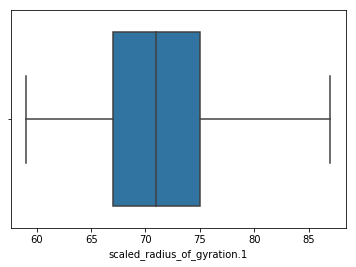

In [25]:
q75, q25 = np.percentile(vehicles_df['scaled_radius_of_gyration.1'], [75 ,25])
iqr = q75 - q25
 
min = q25 - (iqr*1.5)
max = q75 + (iqr*1.5)

vehicles_df.loc[vehicles_df['scaled_radius_of_gyration.1'] > max, 'scaled_radius_of_gyration.1'] = max

#Replaced the outliers with max values 

sns.boxplot(x='scaled_radius_of_gyration.1', data = vehicles_df)

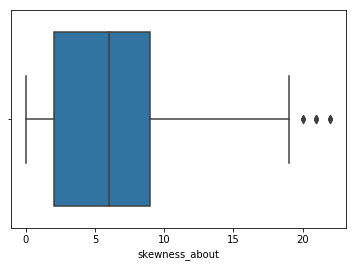

In [26]:
sns.boxplot(x='skewness_about', data = vehicles_df)

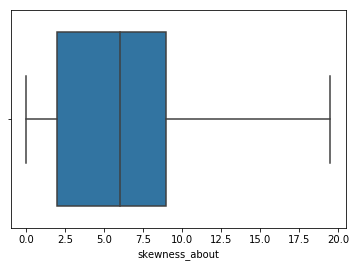

In [27]:
q75, q25 = np.percentile(vehicles_df['skewness_about'], [75 ,25])
iqr = q75 - q25
 
min = q25 - (iqr*1.5)
max = q75 + (iqr*1.5)

vehicles_df.loc[vehicles_df['skewness_about'] > max, 'skewness_about'] = max

#Replaced the outliers with max values

sns.boxplot(x='skewness_about', data = vehicles_df)

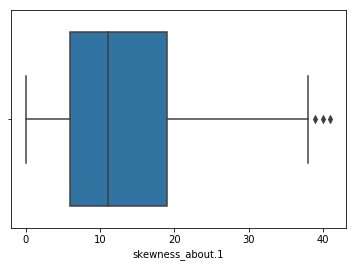

In [28]:
sns.boxplot(x='skewness_about.1', data = vehicles_df)

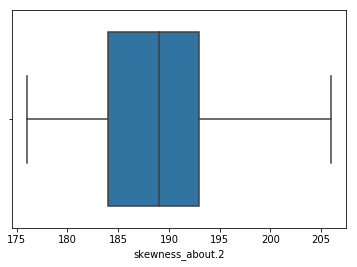

In [29]:
sns.boxplot(x='skewness_about.2', data = vehicles_df)

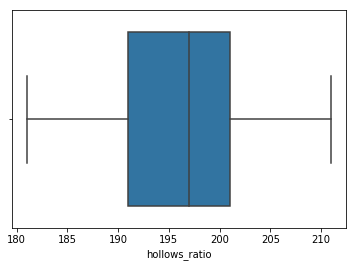

In [30]:
sns.boxplot(x='hollows_ratio', data = vehicles_df)

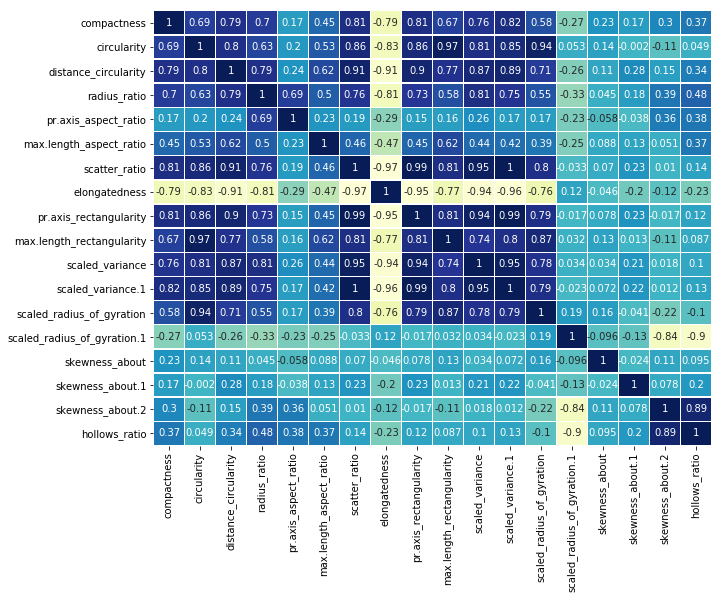

In [31]:
plt.figure(figsize=(10,8))
sns.heatmap(vehicles_df.corr(),
            annot=True,
            linewidths=.5,
            center=0,
            cbar=False,
            cmap="YlGnBu")
plt.show()

In [32]:
# we separate the target variable (class) and save it in the y variable. Also the X contains the independant variables.
y = vehicles_df['class'].values   

X = vehicles_df.drop('class', axis = 1)

#splitting the data in test and train sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 10)

from scipy.stats import zscore
X_train_scaled=X_train.apply(zscore)
X_test_scaled = X_test.apply(zscore)

In [33]:
from sklearn import svm
model =  svm.SVC(gamma='auto')
model.fit(X_train_scaled, y_train)
print(model.score(X_test_scaled, y_test))

0.9570552147239264


SVC without any hyperparameter tuning is overfitting.

In [34]:
from sklearn.decomposition import PCA
pca = PCA(n_components=17)
pca.fit(X_train_scaled)

PCA(copy=True, iterated_power='auto', n_components=17, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [35]:
print(pca.explained_variance_) 

[9.78850508e+00 3.29415743e+00 1.19773652e+00 1.13859272e+00
 8.80570077e-01 7.37065970e-01 3.28504387e-01 2.23905253e-01
 1.26749450e-01 9.20332315e-02 6.10218672e-02 5.33689061e-02
 4.03078377e-02 2.64469535e-02 1.96370743e-02 1.25765834e-02
 6.20775120e-03]


In [36]:
print(pca.explained_variance_ratio_)


[5.42969213e-01 1.82727194e-01 6.64385470e-02 6.31578353e-02
 4.88452974e-02 4.08851124e-02 1.82221664e-02 1.24200435e-02
 7.03080284e-03 5.10509122e-03 3.38488819e-03 2.96037778e-03
 2.23587920e-03 1.46701477e-03 1.08927019e-03 6.97624157e-04
 3.44344489e-04]


[0.54296921 0.72569641 0.79213495 0.85529279 0.90413809 0.9450232
 0.96324537 0.97566541 0.98269621 0.9878013  0.99118619 0.99414657
 0.99638245 0.99784946 0.99893873 0.99963636 0.9999807 ]


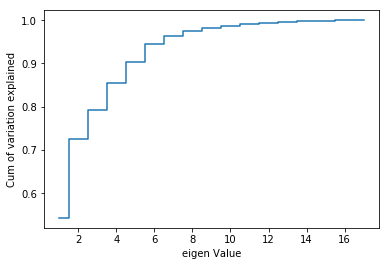

In [37]:
print(np.cumsum(pca.explained_variance_ratio_))
plt.step(list(range(1,18)),np.cumsum(pca.explained_variance_ratio_), where='mid')
plt.ylabel('Cum of variation explained')
plt.xlabel('eigen Value')
plt.show()


In [38]:
#try 7 - pca, 
pca7 = PCA(n_components=7)
pca7.fit(X_train_scaled)
print(pca7.components_)
print(pca7.explained_variance_ratio_)
X_train_scaled_pca = pca7.transform(X_train_scaled)
X_test_scaled_pca = pca7.transform(X_test_scaled)

[[ 0.27093959  0.2894696   0.30172077  0.27230633  0.11382277  0.18329648
   0.30968274 -0.30777357  0.30628787  0.2777346   0.29988721  0.30636039
   0.26619356 -0.04455788  0.04069337  0.05796597  0.03384122  0.08178202]
 [-0.09321393  0.13141814 -0.05167241 -0.18176668 -0.23734727 -0.1052814
   0.07521314 -0.01231249  0.08913323  0.11193862  0.07632169  0.08101235
   0.20345799  0.50361157 -0.05102734 -0.08139369 -0.51210239 -0.51550405]
 [ 0.04398291 -0.20144589  0.09804169 -0.0453502  -0.30326941 -0.16139718
   0.12092104 -0.0774248   0.13065111 -0.2067566   0.11042377  0.12993631
  -0.21321351  0.00239538 -0.2603419   0.77757054 -0.01976189 -0.00577836]
 [-0.1758831  -0.04996254 -0.05225733  0.25594843  0.53937423 -0.12305625
   0.01178039 -0.07213179 -0.01204615 -0.09661179  0.09839096  0.00937188
  -0.0404175   0.13219456 -0.73036338 -0.102102   -0.0292508  -0.0620617 ]
 [ 0.16747798 -0.1071487  -0.11591123  0.12795941  0.12751796 -0.74816445
   0.10063706 -0.10116004  0.088418

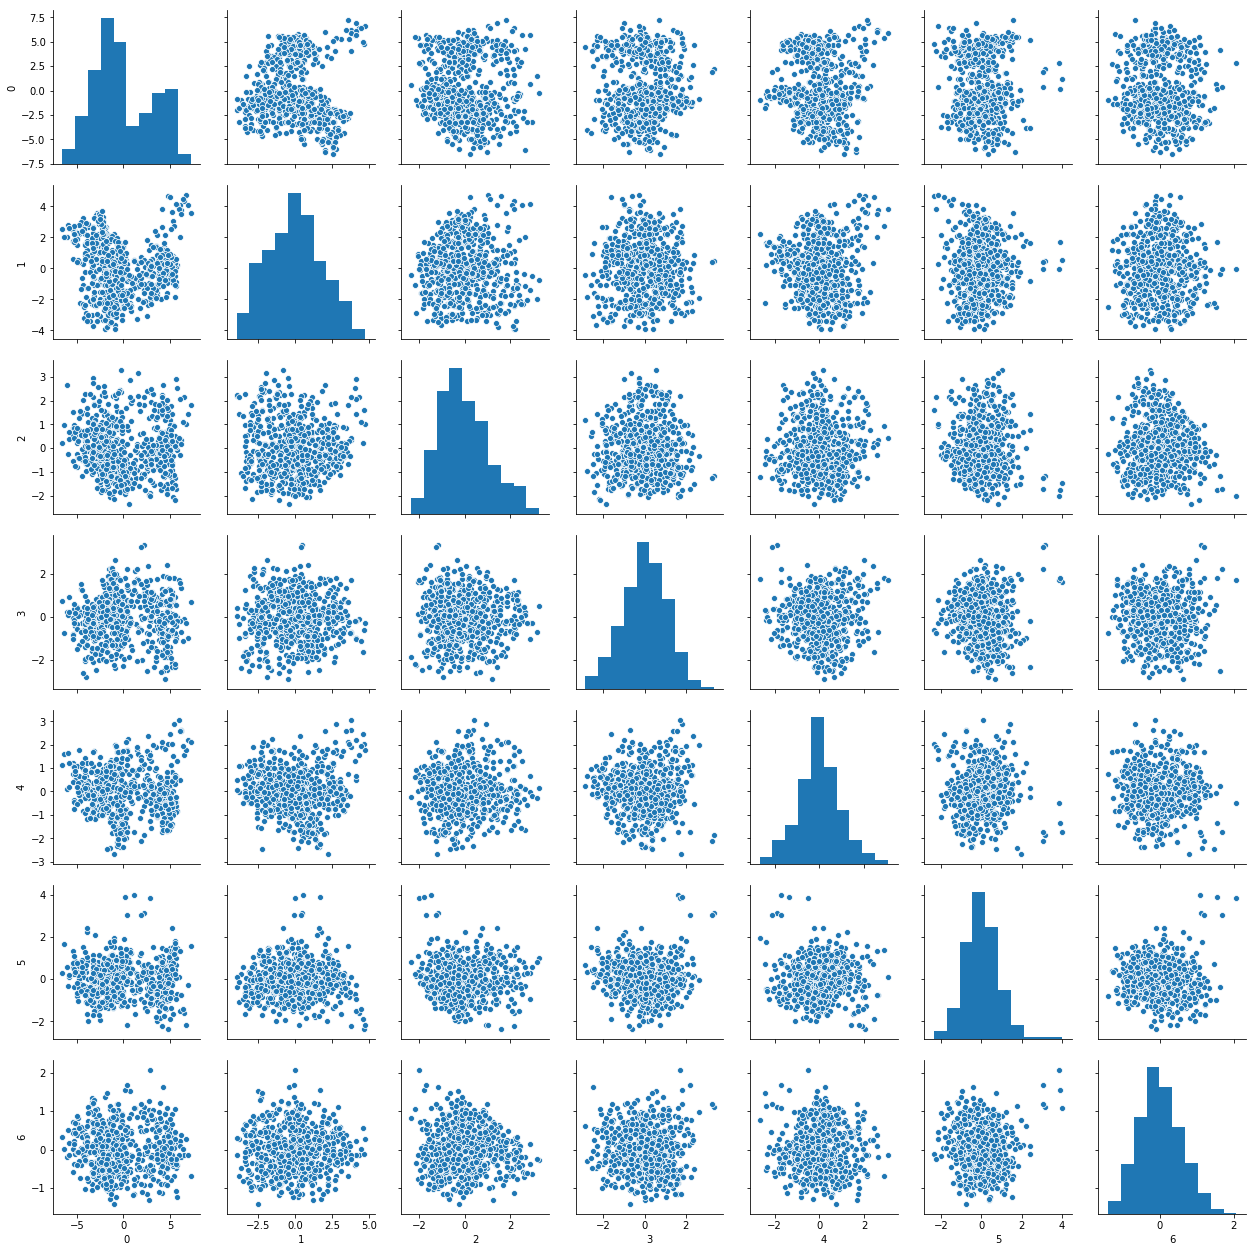

In [39]:
sns.pairplot(pd.DataFrame(X_train_scaled_pca))

In [40]:
# Set the parameters by cross-validation
tuned_parameters = [{'kernel': ['rbf'], 'gamma': ['auto'], 'C': [0.01, 0.05, 0.5, 1 ]},
                    {'kernel': ['linear'], 'gamma': ['auto'] ,'C': [0.01, 0.05, 0.5, 1 ]}]

scores = ['recall']

for score in scores:
    clf = sklearn.model_selection.GridSearchCV(sklearn.svm.SVC(), tuned_parameters, cv=5, return_train_score=True,
                       scoring='%s_macro' % score)
    clf.fit(X_train_scaled_pca, y_train)

    print("Best parameters set found on training set:")
    print("------------------------------------------")
    print(clf.best_params_)
    print()
    print("Detailed classification report:")
    print("-------------------------------")
    print("The scores are computed on the test set.")
    print()
    y_pred =  clf.predict(X_test_scaled_pca)
    print(sklearn.metrics.classification_report(y_test, y_pred))
 

Best parameters set found on training set:
------------------------------------------
{'C': 1, 'gamma': 'auto', 'kernel': 'rbf'}

Detailed classification report:
-------------------------------
The scores are computed on the test set.

              precision    recall  f1-score   support

         bus       0.98      0.98      0.98        43
         car       0.97      0.92      0.94        91
         van       0.79      0.90      0.84        29

   micro avg       0.93      0.93      0.93       163
   macro avg       0.91      0.93      0.92       163
weighted avg       0.94      0.93      0.93       163



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


The model score is 93 % with the hyper parameters given. Overfitting is reduced to great extent.